In [1]:
using Plots

include("../src/Schemish.jl")
using .Schemish

include("../src/AppendixA.jl")
using .AppendixA

# 1 - The Lines Sleep Tonight

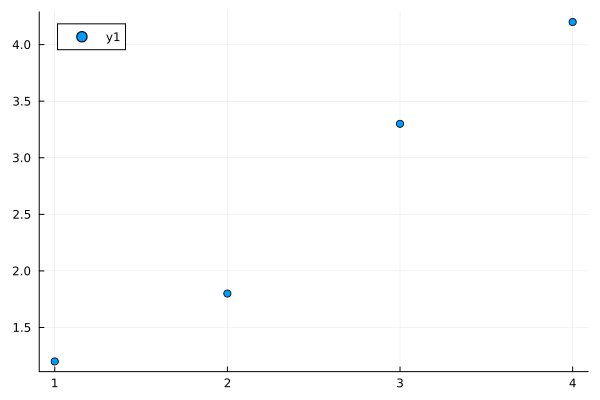

In [2]:
line_xs = tensor([2.0, 1.0, 4.0, 3.0])
line_ys = tensor([1.8, 1.2, 4.2, 3.3])

plot(line_xs.elements, line_ys.elements, seriestype=:scatter)

In [3]:

# frame 26:25

line(x) = (θ) -> ref(θ, 0) * x + ref(θ, 1)

line (generic function with 1 method)

In [4]:
line(5)(list(1,2))

7

# 2 - The More We Learn, the Tenser We Become

In [5]:
@assert is_scalar(9)
@assert is_scalar(3.1415)
@assert !is_scalar(tensor([1]))
@assert tlen(tensor([17, 12, 91, 67])) == 4
@assert tlen(tensor([[3, 2, 8], [7, 1, 9]])) == 2

In [6]:

# frame 39:37

function shape(t)
    result = list()
    while !is_scalar(t)
        # the iterative implementation requires us to append to the list,
        # in contrast to the book's recursive implementation that prepends.
        result = snoc(result, tlen(t))
        t = tref(t, 0)
    end
    result
end

shape (generic function with 1 method)

In [7]:
@assert shape(9) == list()
@assert shape(tensor([9, 4, 7, 8, 0, 1])) == list(6)
@assert shape(tensor([[[5], [6], [8]], [[7], [9], [5]]])) == list(2, 3, 1)

In [8]:

# frame 42:44

function rank(t)
    result = 0
    while !is_scalar(t)
        # this is mostly equivalent to the books accumulator passing style;
        # we just mutate the accumulator in place.
        result += 1
        t = tref(t, 0)
    end
    result
end

rank (generic function with 1 method)

In [9]:
@assert rank(9) == 0
@assert rank(tensor([9, 4, 7, 8, 0, 1])) == 1
@assert rank(tensor([[[5], [6], [8]], [[7], [9], [5]]])) == 3

# Interlude I - The More We Extend, the Less Tensor We Get

In [10]:
@assert tensor([5, 6, 7]) + tensor([2, 0, 1]) == tensor([7, 6, 8])
@assert 4 + tensor([3, 6, 5]) == tensor([7, 10, 9])
@assert tensor([6, 9, 1]) + tensor([[4, 3, 8], [7, 4, 7]]) == tensor([[10, 12, 9], [13, 13, 8]])
@assert tensor([[4, 6, 5], [6, 9, 7]]) * 3 == tensor([[12, 18, 15], [18, 27, 21]])

@assert sqrt(tensor([9, 16, 25])) == tensor([3, 4, 5])
@assert sqrt(tensor([[49, 81, 16], [64, 25, 36]])) == tensor([[7, 9, 4], [8, 5, 6]])

In [11]:

# frame 53:24

function sum_1(t)
    result = 0
    for i in 0:tlen(t)-1
       result = result + tref(t, i)
    end
    result
end

sum = ext1(sum_1, 1)

(::Main.Schemish.var"#extended#4"{typeof(sum_1), Int64}) (generic function with 1 method)

In [12]:
@assert sum_1(tensor([10.0, 12.0, 14.0])) == 36.0
@assert sum(tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])) == tensor([[3, 7], [11, 15]])

In [13]:
line(tensor([2,7,5,11]))(list(4, 6))

[14 34 26 50]

# 3 - Running Down a Slippery Slope

In [14]:

# frame 63:22

l2_loss(target) = (xs, ys) -> (θ) -> sum(sqr(ys - target(xs)(θ)))

l2_loss (generic function with 1 method)

In [15]:
expectant = l2_loss(line)
objective = expectant(line_xs, line_ys)
loss_0 = objective(list(0.0, 0.0))

33.21

In [16]:
loss_0_ = objective(list(0.0099, 0.0))
rate_of_change = (loss_0_ - loss_0) / 0.0099
θ0_1 = 0.0 - rate_of_change * 0.01
loss_1 = objective(list(θ0_1, 0.0))

5.502108626999984

In [17]:
loss_1_ = objective(list(θ0_1+0.0099, 0.0))
rate_of_change = (loss_1_ - loss_1) / 0.0099

-25.08119999999999

As we see, the rate of change depends on the current θ...

# 4 - Slip-slidin' Away

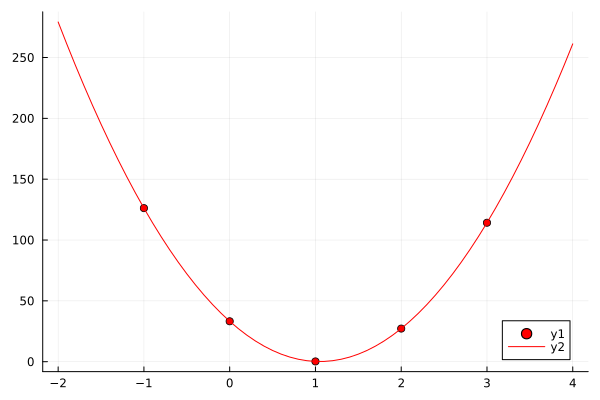

In [18]:
let θ0s = [-1, 0, 1, 2, 3]
    let losses = [objective(list(θ0, 0.0)) for θ0 in θ0s]
        plot(θ0s, losses, seriestype=:scatter, color=:red)
    end
end

let θ0s = -2:0.1:4
    let losses = [objective(list(θ0, 0.0)) for θ0 in θ0s]
        plot!(θ0s, losses, color=:red)
    end
end

In [19]:
foo(x) = sqrt(x)
[gradient_of((θ)->foo(ref(θ, 0)), list(x)) for x in 0:4]

5-element Vector{Tuple{Float64}}:
 (Inf,)
 (0.5,)
 (0.35355339059327373,)
 (0.2886751345948129,)
 (0.25,)

In [20]:
map_star((x)->0, tensor([[1,2,3], [1,2,3]]))

[[[0 0 0]] [[0 0 0]]]

In [21]:
2^3

8